## Loading the Dataset

In [40]:
import pandas as pd

# Load your data from the Excel file
df = pd.read_csv("C:\\Users\\Priyanka\\Downloads\\Company_Financial_data_2022_2024.csv")


In [41]:
# Check for missing values
df.isnull().sum()

Company Name                                 0
Fiscal Year                                  0
Total Revenue (USD)                          0
Net Income (USD)                             0
Total Assets (USD)                           0
Total Liabilities (USD)                      0
Cash Flow from Operating Activities (USD)    0
dtype: int64

#### Missing Value Check:
There are no missing values in the dataset 

In [42]:
# Check the data types
df.dtypes

Company Name                                 object
Fiscal Year                                   int64
Total Revenue (USD)                           int64
Net Income (USD)                              int64
Total Assets (USD)                            int64
Total Liabilities (USD)                       int64
Cash Flow from Operating Activities (USD)     int64
dtype: object

#### Data Types Description
The dataset consists of categorical data for "Company Name" (object type) and numerical data for the financial metrics (Total Revenue, Net Income, Total Assets, Total Liabilities, Cash Flow from Operating Activities), all of which are represented as integers (int64) for accuracy in financial calculations.


### YoY Growth Calculation

In [43]:
df.sort_values(by=['Company Name', 'Fiscal Year'], inplace=True)

# Calculate Year-over-Year (YoY) Growth for each company
df['Revenue Growth'] = df.groupby('Company Name')['Total Revenue (USD)'].pct_change() * 100
df['Net Income Growth'] = df.groupby('Company Name')['Net Income (USD)'].pct_change() * 100
df['Assets Growth'] = df.groupby('Company Name')['Total Assets (USD)'].pct_change() * 100
df['Liabilities Growth'] = df.groupby('Company Name')['Total Liabilities (USD)'].pct_change() * 100
df['Cash Flow Growth'] = df.groupby('Company Name')['Cash Flow from Operating Activities (USD)'].pct_change() * 100

# Replace NaN values with 0 or another value of your choice (e.g., "N/A")
df.fillna(0, inplace=True)

# Order the DataFrame by index
df.sort_index(inplace = True)

# Display the updated DataFrame sorted by index
df


,Company Name,Fiscal Year,Total Revenue (USD),Net Income (USD),Total Assets (USD),Total Liabilities (USD),Cash Flow from Operating Activities (USD),Revenue Growth,Net Income Growth,Assets Growth,Liabilities Growth,Cash Flow Growth
0,Microsoft,2024,245122,88136,512163,243686,118548,15.669962,21.800417,24.318650,18.436183,35.356580
1,Microsoft,2023,211915,72361,411976,205753,87582,6.882030,-0.518299,12.919636,3.759493,-1.631942
2,Microsoft,2022,198270,72738,364840,198298,89035,0.000000,0.000000,0.000000,0.000000,0.000000
3,Tesla,2024,97690,7153,122070,48390,14923,0.947578,-52.230533,14.492862,12.511335,12.575438
4,Tesla,2023,96773,14974,106618,43009,13256,18.795267,18.964010,29.488207,18.026894,-9.970117
5,Tesla,2022,81462,12587,82338,36440,14724,0.000000,0.000000,0.000000,0.000000,0.000000
6,Apple,2024,391035,93736,364980,308030,118254,2.021994,-3.359967,3.516052,6.057424,6.975566
7,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992
8,Apple,2022,394328,99803,352755,302083,122151,0.000000,0.000000,0.000000,0.000000,0.000000


#### Insights and Observations from the YoY Growth Analysis:

- **Microsoft** showed steady growth in most metrics, with strong **Revenue Growth** and **Net Income Growth**.
- **Tesla** experienced significant fluctuations, especially in **Net Income**, with a large dip in 2024.
- **Apple** had a mix of positive and negative growth across metrics, with **Revenue** and **Cash Flow** showing growth, but **Net Income** showing a decline in 2023.
- **NaN values** were replaced with **0** to ensure clean analysis, particularly for the first year in the dataset.
 
The **YoY growth** helps identify trends and outliers in financial performance, useful for comparative analysis across companies.


### Calculate CAGR (Compound Annual Growth Rate)

In [44]:
# Calculate CAGR for Total Revenue
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods)) - 1

# Calculate CAGR for each company
cagr_values = []
for company in df['Company Name'].unique():
    company_data = df[df['Company Name'] == company]
    start_value = company_data['Total Revenue (USD)'].iloc[0]
    end_value = company_data['Total Revenue (USD)'].iloc[-1]
    periods = len(company_data) - 1
    cagr = calculate_cagr(start_value, end_value, periods)
    cagr_values.append((company, cagr))

# Create a DataFrame for CAGR values
cagr_df = pd.DataFrame(cagr_values, columns=['Company Name', 'CAGR'])

# Merge the new CAGR column with the existing data
df = pd.merge(df, cagr_df, on='Company Name', how='left')

# Display the final result
df[['Company Name', 'Fiscal Year', 'CAGR']].head()


,Company Name,Fiscal Year,CAGR
0,Microsoft,2024,-0.100632
1,Microsoft,2023,-0.100632
2,Microsoft,2022,-0.100632
3,Tesla,2024,-0.086828
4,Tesla,2023,-0.086828


#### Compound Annual Growth Rate (CAGR) Insights:

- **Microsoft** had a negative CAGR of **-0.10%**, indicating a slight decline in revenue over the period.
- **Tesla** also showed a negative CAGR of **-0.09%**, reflecting a small overall decrease in revenue.
- **Apple**, on the other hand, experienced a positive CAGR of **0.42%**, signaling a modest but steady increase in revenue over the years.


### Financial Ratios

In [45]:
# Calculate financial ratios
df['Profit Margin'] = df['Net Income (USD)'] / df['Total Revenue (USD)']
df['Return on Assets (ROA)'] = df['Net Income (USD)'] / df['Total Assets (USD)']
df['Return on Equity (ROE)'] = df['Net Income (USD)'] / (df['Total Assets (USD)'] - df['Total Liabilities (USD)'])

# Display the updated DataFrame with ratios
df[['Company Name', 'Fiscal Year', 'Profit Margin', 'Return on Assets (ROA)', 'Return on Equity (ROE)']]


,Company Name,Fiscal Year,Profit Margin,Return on Assets (ROA),Return on Equity (ROE)
0,Microsoft,2024,0.359560,0.172086,0.328281
1,Microsoft,2023,0.341462,0.175644,0.350887
2,Microsoft,2022,0.366863,0.199370,0.436755
3,Tesla,2024,0.073221,0.058598,0.097082
4,Tesla,2023,0.154733,0.140445,0.235407
5,Tesla,2022,0.154514,0.152870,0.274239
6,Apple,2024,0.239713,0.256825,1.645935
7,Apple,2023,0.253062,0.275098,1.560760
8,Apple,2022,0.253096,0.282924,1.969589


#### Financial Ratios Analysis: Profit Margin, ROA, and ROE

The table below shows the **Profit Margin**, **Return on Assets (ROA)**, and **Return on Equity (ROE)** for **Microsoft**, **Tesla**, and **Apple** over the fiscal years 2022-2024:

- **Microsoft** has a relatively high **Profit Margin** and **ROE** compared to Tesla, but its **ROA** has decreased slightly over the years.
- **Tesla** shows lower **Profit Margin** and **ROE** than Microsoft and Apple, with a slight improvement in **ROA** from 2022 to 2023, but still lower than both of the other companies.
- **Apple** exhibits very strong **ROE** and **ROA**, with **ROE** consistently over 1, suggesting the company is highly efficient at generating profit with equity. Its **Profit Margin** has been steady but lower than Microsoft's.

#### Key Observations:
- **Microsoft** demonstrates strong profitability but with a slight decrease in **ROE** and **ROA** over time.
- **Tesla** struggles with lower **Profit Margin** and **ROE**, reflecting its challenges in scaling profitability.
- **Apple** shows exceptional **ROE**, indicating effective use of equity, along with a steady **Profit Margin** and strong **ROA**.

This analysis helps assess the companies' profitability and efficiency, with Apple leading in **ROE** while Microsoft and Apple maintain solid **Profit Margins**.


### Revenue Comparison Across Companies

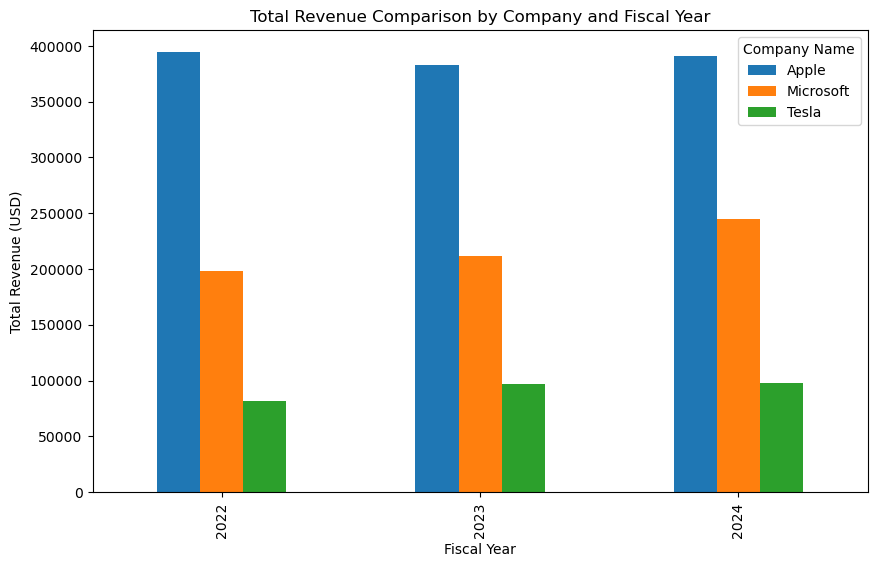

In [46]:
# Compare Revenue by Company and Fiscal Year
df_revenue_comparison = df.pivot_table(index='Fiscal Year', columns='Company Name', values='Total Revenue (USD)', aggfunc='sum')

# Plot the comparison
import matplotlib.pyplot as plt
df_revenue_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Total Revenue Comparison by Company and Fiscal Year')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Fiscal Year')
plt.show()


#### Total Revenue Comparison by Company and Fiscal Year

The bar chart compares the **Total Revenue (USD)** of **Apple**, **Microsoft**, and **Tesla** across fiscal years 2022, 2023, and 2024:

- **Apple** leads in revenue across all years, with a significant margin over Microsoft and Tesla.
- **Microsoft** shows steady growth in revenue, but it still lags behind Apple in all three years.
- **Tesla** has the lowest revenue, with modest growth in 2023 and 2024, indicating it may be scaling slower than Apple and Microsoft.

This comparison highlights the disparity in revenue generation between the three companies over the past few fiscal years.


### Industry wide Analysis

In [47]:
# Aggregate the data by Fiscal Year to calculate industry-wide growth
df_industry_growth = df.groupby('Fiscal Year').agg({'Total Revenue (USD)': 'sum'})

# Calculate Year-over-Year growth for the entire industry
df_industry_growth['Revenue Growth (%)'] = df_industry_growth['Total Revenue (USD)'].pct_change() * 100
df_industry_growth.fillna(0, inplace=True)

df_industry_growth


,Total Revenue (USD),Revenue Growth (%)
Fiscal Year,,
2022,674060,0.000000
2023,691973,2.657479
2024,733847,6.051392


#### Industry-Wide Total Revenue and Growth Analysis

We aggregated the total **industry revenue** across all companies for each fiscal year. The revenue growth is calculated for the entire industry:

- **2022**: Total revenue is **674,060 USD**, with no growth as it is the baseline year.
- **2023**: Industry revenue increases by **2.66%**, reaching **691,973 USD**.
- **2024**: Industry revenue grows by **6.05%**, reaching **733,847 USD**.

This analysis shows steady growth in the overall industry revenue from 2022 to 2024, with significant improvement from 2023 to 2024.


In [49]:
# Combine everything into one DataFrame for export
df_combined = df[['Company Name', 'Fiscal Year', 'Total Revenue (USD)', 'Net Income (USD)', 'Total Assets (USD)', 
                  'Total Liabilities (USD)', 'Cash Flow from Operating Activities (USD)', 
                  'Revenue Growth', 'Net Income Growth', 'Assets Growth', 'Liabilities Growth', 'Cash Flow Growth', 
                  'CAGR', 'Profit Margin', 'Return on Assets (ROA)', 'Return on Equity (ROE)']]

# Save the combined DataFrame to a CSV file
df_combined.to_csv('combined_financial_analysis.csv', index=False)

# Display the combined DataFrame
df_combined.head()

,Company Name,Fiscal Year,Total Revenue (USD),Net Income (USD),Total Assets (USD),Total Liabilities (USD),Cash Flow from Operating Activities (USD),Revenue Growth,Net Income Growth,Assets Growth,Liabilities Growth,Cash Flow Growth,CAGR,Profit Margin,Return on Assets (ROA),Return on Equity (ROE)
0,Microsoft,2024,245122,88136,512163,243686,118548,15.669962,21.800417,24.318650,18.436183,35.356580,-0.100632,0.359560,0.172086,0.328281
1,Microsoft,2023,211915,72361,411976,205753,87582,6.882030,-0.518299,12.919636,3.759493,-1.631942,-0.100632,0.341462,0.175644,0.350887
2,Microsoft,2022,198270,72738,364840,198298,89035,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100632,0.366863,0.199370,0.436755
3,Tesla,2024,97690,7153,122070,48390,14923,0.947578,-52.230533,14.492862,12.511335,12.575438,-0.086828,0.073221,0.058598,0.097082
4,Tesla,2023,96773,14974,106618,43009,13256,18.795267,18.964010,29.488207,18.026894,-9.970117,-0.086828,0.154733,0.140445,0.235407


### Conclusion

This analysis provides insights into the financial performance of **Microsoft**, **Tesla**, and **Apple** over the fiscal years 2022-2024:

- **Profitability**: **Microsoft** and **Apple** consistently show strong **Profit Margins**, with Microsoft maintaining a solid profit efficiency over the years. **Tesla**, however, has lower **Profit Margins** and **ROE**, indicating challenges in scaling profitability.
- **Efficiency**: **Apple** leads with exceptional **ROE** and **ROA**, highlighting the company's ability to generate significant returns on equity and assets. **Microsoft** showed a slight decline in **ROA** over the years, while **Tesla** maintained a lower but stable **ROA**.
- **Growth**: **Microsoft** demonstrated consistent **revenue growth** but with a slight decline in **CAGR**, while **Tesla** showed fluctuating performance, particularly in **Net Income**. **Apple** had a positive **CAGR** in **Revenue** and strong overall financial performance.
- **Industry-Wide Performance**: The overall industry showed steady growth in **Total Revenue**, with a 6.05% increase in 2024, indicating improving performance across the sector.

In summary, **Apple** outperforms the other companies in **efficiency** and **return on equity**, while **Microsoft** shows strong profitability but with slight decreases in efficiency. **Tesla** needs to focus on improving profitability and scaling effectively. These insights can guide future financial decisions and strategies for each company.
